# **Data Modelling and Evaluation**

## Objectives

* This notebook will address business requirtement 2: "Predicting if a cherry leaf is healthy or contains powdery mildew."

## Inputs

* inputs/cherry_leaves_dataset/cherry-leaves/train
* inputs/cherry_leaves_dataset/cherry-leaves/test
* inputs/cherry_leaves_dataset/cherry-leaves/validation
* embeddings of image shapes

## Outputs

* plot of image distribution in train, validation, and test set
* image augmentation
* class indices to change prediction inference in labels
* machine learning model creation and training
* save the trained model
* learning curve plot for model performance
* model evaluation on pickle file
* prediction on the random image file

## Additional Comments

* In this notebook we will develop the ML model and train it using the train and validation sets. We will then evaluate using the test set to determine if business requirement 2 has been met.



---

# Import Libraries

In [ ]:
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy

# Set working directory

In [2]:
current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/Users/nathalievonheyl/Documents/ci-code_institute/PP5/pp5_mildew-detection'

## Set input directories

Set paths for train, validation and test sets

In [3]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = os.path.join(my_data_dir, "train")
val_path = os.path.join(my_data_dir, "validation")
test_path = os.path.join(my_data_dir, "test")

## Set output directory

In [4]:
version = 'v1'
file_path = os.path.join("outputs", version)

if os.path.exists(file_path):
    print('Old version is already available create a new version.')
else:
    os.makedirs(file_path)

Old version is already available create a new version.


## Set Labels

In [5]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['powdery_mildew', 'healthy']


## Set image shape

Import the saved image shape embedding

In [ ]:
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(128, 128, 3)

---

# Visualizing class distributions

## Number of images in each set (train, validation, and test)

I will count the number of images in each of the folders ('train', 'validation', and 'test') and subfolders (labels). The counts will then be stored in a dictionary. This dictionary is then converted into a DataFrame which will be visualizing the label distribution with a bar plot.

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 210 images
* validation - healthy: 210 images
* test - powdery_mildew: 422 images
* test - healthy: 422 images




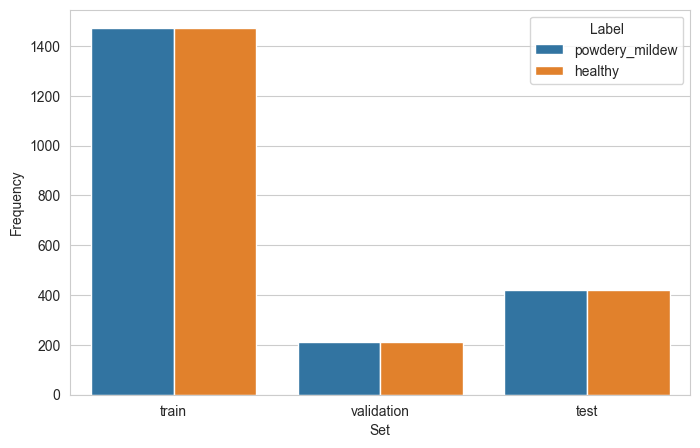

In [ ]:
data = {'Set': [], 'Label': [], 'Frequency': []}

folders = ['train', 'validation', 'test']

for folder in folders:
    for label in labels:
        label_path = os.path.join(my_data_dir, folder, label)
        image_count = len(os.listdir(label_path))

        data['Set'].append(folder)
        data['Label'].append(label)
        data['Frequency'].append(image_count)

        print(
            f"* {folder} - {label}: {image_count} images")

df_freq = pd.DataFrame(data)

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')

plt.savefig(os.path.join(file_path, 'labels_distribution.png'), bbox_inches='tight', dpi=150)
plt.show()

The class labels are evenly distributed among the split sets.

---

# Image data augmentation

I am using a function that generates batches of image data with real-time data augmentation. This process is artificially creating more training images with a combination of multiple processes like random rotation, shifting width or height, shearing, zooming, flipping horizontally and vertically, optionally filling broken pixels with nearest pixel value, and standardizing the image pixels between 0 to 255 pixels.

In [ ]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* Augment the train image dataset

In [ ]:
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True
                                                    )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* Augment the validation image dataset

In [11]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* Augment the test image dataset

In [12]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='categorical',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented images

* Plot augmented images from the training dataset

(20, 128, 128, 3)


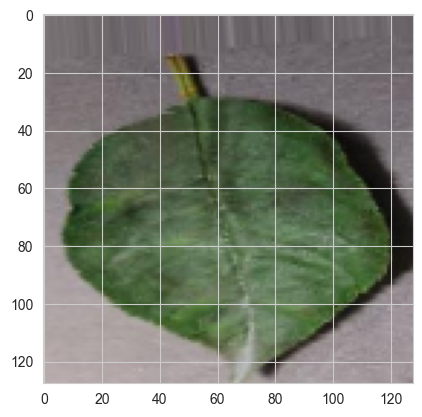

(20, 128, 128, 3)


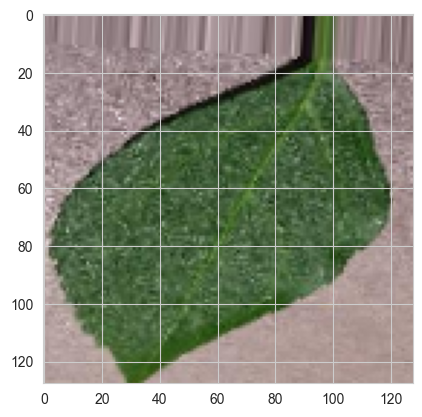

(20, 128, 128, 3)


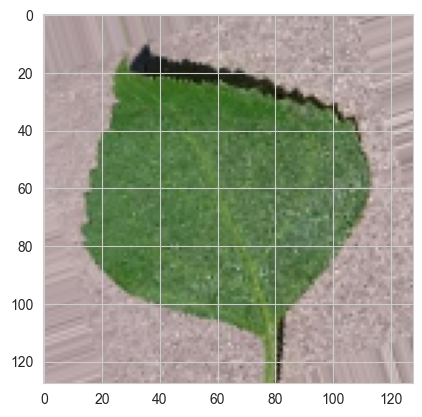

In [ ]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* Plot augmented images from the validation dataset

(20, 128, 128, 3)


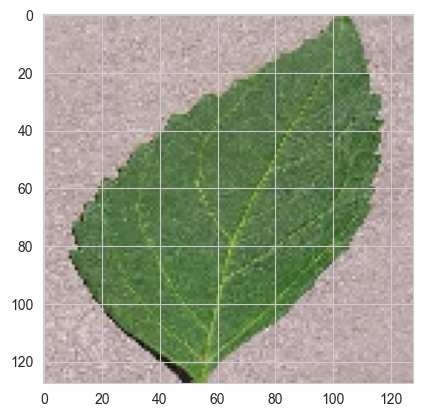

(20, 128, 128, 3)


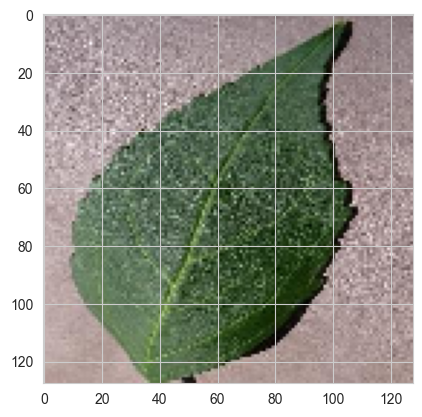

(20, 128, 128, 3)


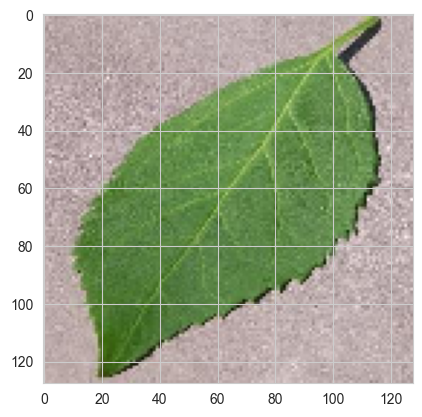

In [19]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* Plot augmented images from the testing dataset

(20, 128, 128, 3)


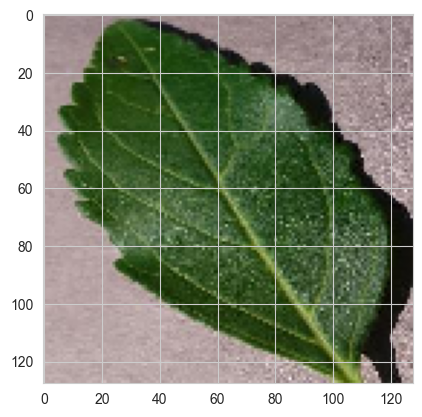

(20, 128, 128, 3)


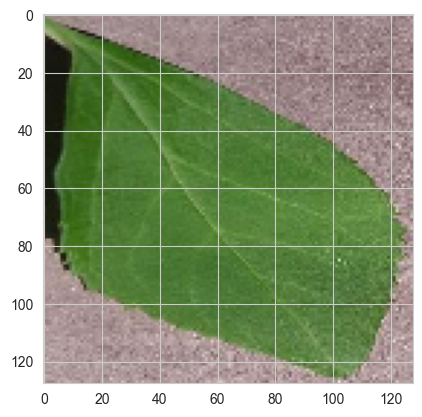

(20, 128, 128, 3)


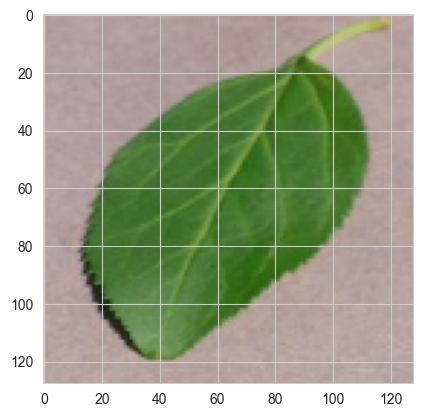

In [20]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [21]:
joblib.dump(value=train_set.class_indices, filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

# ML Model Creation

## Import packages

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Create machine learning model

The following function has no inputs and returns a ready-to-use model.

In [24]:
def create_tf_model():
    """
    Function to create a CNN for image classification
    
    Uses 3 Conv2D layers to detect features
    Applies MaxPooling2D to reduce image size
    Flattens and passes data through Dense layers for classification
    Uses dropout to prevent overfitting
    
    Outputs a model with two categories
    """
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

# Conclusions and Next Steps

... 